In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import palettable
import matplotlib


In [5]:
path = "../data/AllanTestResult/"
noun = 'equipment'
df = pd.read_csv(path + noun + "_AllanTest.csv")
print(len(df.loc[df['Denumerator'].notnull() == True, "Denumerator"].values))

2188


In [6]:
def makedf(path, save=False):
    cols = ["A+N","F+N", "all+N", "O-Den"]
    cols2 = ["Non-Denumerators","Bare Plural", "Bare Singular"]
    cols3 = [ 'number', 'digits', 'plural numeral', 'approximative', 'comparative', 'round numbers',
             'imprecise quantifier', 'precise quantifier', 'measure', 'pair', ]
    cols4 = ['non-denumerating quantifier', 'non-quantificational']
    
    data = pd.DataFrame(columns=["Noun"]+cols+cols2+cols3)
    files = os.listdir(path)
    idx = 0
    for f in files:
        if f == '.DS_Store': continue
        print("...running "+f)
        df = pd.read_csv(path +f)
        data.at[idx, "Noun"] = f.replace("_AllanTest.csv", "")
        dnums_len = len(df.loc[df['Denumerator'].notnull() == True, "Denumerator"].values)
        # divide by 0 check 
        if dnums_len == 0: dnums_len = 1
        for c in cols:
            val = len(df.loc[df[c] != 0, c].values) / dnums_len
            data.at[idx, c] = val
            
        non_dnum = df.loc[df['Allan Type'] == "non-Denumerator", 'Allan Type'].values
        data.at[idx, "Non-Denumerators"] = len(non_dnum) / dnums_len
        data.at[idx, "Bare Plural"] = len(df.loc[df["Bareness of Noun"]=="bare plural", "Bareness of Noun"].values) / df.shape[0]
        data.at[idx, "Bare Singular"] = len(df.loc[df["Bareness of Noun"]=="bare singular", "Bareness of Noun"].values) / df.shape[0]
        data.at[idx, "N/A"] = len(df.loc[df["Allan Type"] == "Not Applicable", "Allan Type"].values) / dnums_len
        
        for c in cols3:
            val = len(df.loc[df['SubType'] == c, 'SubType'].values) / dnums_len
            data.at[idx, c] = val
        for c in cols4:
            c1 = c.replace("-", " ")
            val = len(df.loc[df['SubType'] == c1, 'SubType'].values) / dnums_len
            data.at[idx, c] = val
        
        # handle "the"
        val_the = len(df.loc[df['SubType'] == 'the', 'SubType'].values) / dnums_len
        data.at[idx,'"the"'] = val_the
        # handle "a/an"
        val_a_an = len(df.loc[df['SubType'] == 'a/an', 'SubType'].values) / dnums_len
        data.at[idx,'"a"/"an"'] = val_a_an
        
        idx +=1
    if save: data.to_csv("countabilityAnalysis.csv", index=False)
    print("Done!")
    return data  


In [ ]:
data = makedf("..data/newAllanTestResult/", save=False)

In [8]:
data = data.sort_values(by=['A+N'],ascending=False)

In [9]:
data

,Noun,A+N,F+N,all+N,O-Den,Non-Denumerators,Bare Plural,Bare Singular,number,digits,...,round numbers,imprecise quantifier,precise quantifier,measure,pair,N/A,non-denumerating quantifier,non-quantificational,"""the""","""a""/""an"""
19,waste,0.457596,0.00136054,0.0172336,0.0312925,0.502494,0.0748597,0.649106,0.00770975,0.0113379,...,0,0.00136054,0.0131519,0,0,0.005896,0.000000,0.129252,0.373243,0.458050
24,silver,0.361727,0.00233372,0.00583431,0.0816803,0.506418,0.00121292,0.814643,0.0571762,0.103851,...,0,0.00233372,0.00700117,0.00116686,0.00350058,0.047841,0.000000,0.040840,0.460910,0.273046
28,china,0.347826,0.0117057,0.0167224,0.210702,0.379599,0.000304843,0.743284,0.130435,0.148829,...,0,0.0100334,0.0267559,0,0,0.048495,0.000000,0.045151,0.334448,0.252508
5,litter,0.337469,0.0223325,0.00248139,0.0620347,0.57072,0.0429688,0.528906,0.0496278,0.00496278,...,0,0.0173697,0.0124069,0,0,0.007444,0.000000,0.069479,0.501241,0.327543
9,squad,0.317033,0.00570497,0,0.0668297,0.573757,0.0930325,0.273159,0.0383048,0.0114099,...,0,0.00570497,0.0220049,0.000814996,0,0.035860,0.000000,0.018745,0.554197,0.312958
27,inventory,0.295216,0.00350058,0,0.0373396,0.649942,0.108331,0.337003,0.0134189,0.0128355,...,0.000583431,0.00291715,0.0134189,0,0,0.014002,0.000000,0.041424,0.608518,0.292882
4,change,0.280767,0.0281301,0.00155784,0.106378,0.573552,0.269933,0.306194,0.0190057,0.00703254,...,8.90195e-05,0.0271954,0.087061,0.000133529,0,0.008190,0.000178,0.155517,0.417724,0.276984
13,swag,0.226415,0.0188679,0.0188679,0.132075,0.603774,0.161765,0.227941,0.0188679,0.0754717,...,0,0.0188679,0.0754717,0,0,0.000000,0.000000,0.113208,0.490566,0.207547
44,freight,0.201754,0,0.0350877,0.0526316,0.736842,0.020585,0.801733,0.00877193,0.00877193,...,0,0,0.0350877,0,0,0.008772,0.000000,0.140351,0.596491,0.201754
20,housing,0.195906,0.00730994,0.0116959,0.0540936,0.725146,0.00453044,0.832846,0.0190058,0.0263158,...,0,0.00438596,0.0160819,0,0,0.017544,0.000000,0.083333,0.641813,0.188596


In [20]:
colors = [(0,0,205,1), (0,191,255,1), (0,102,0,1), (102,255,51,1), (255,102,0,1),
          (255,255,0,1), (255,0,0,1), (128,0,0,1), (204,153,255,1), (0,153,153,1),
         (204,153,0,1), (255,51,153,1), (153,204,255,1), (105,105,105,1)]
hatch_set =['/', 'X', 'O', '-', '+', '\\', 'x', '|', 'o', '*', '.', '/', '-']
colors_fixed = []
for c in colors:
    colors_fixed.append((c[0]/255, c[1]/255, c[2]/255, 1))

cmap_custom = matplotlib.colors.LinearSegmentedColormap.from_list("custom", colors_fixed, 14)

grey1 = [(56,56,56,1), (145,145,145,1), (102,102,102,1), (200,200,200,1)]
grey1_fixed = []
for c in grey1:
    grey1_fixed.append((c[0]/255, c[1]/255, c[2]/255, 1))
                       
grey_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", grey1_fixed, 4)

In [128]:
greys = [30, 120, 40, 150, 65, 125, 70, 185, 90, 150, 190, 135, 170, 210]
greys = [(x/255,x/255,x/255, 1) for x in greys]
greys_full_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", greys, 14)

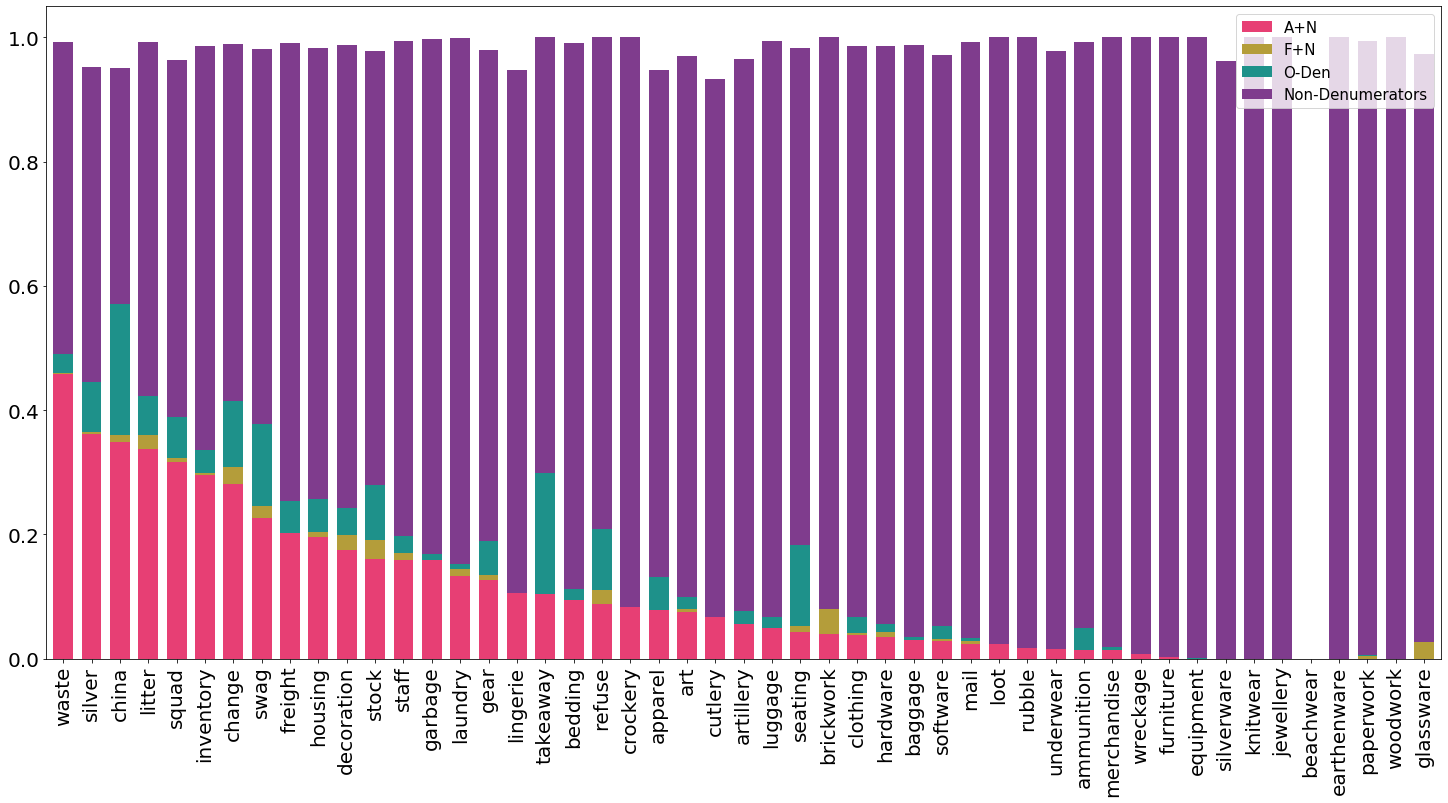

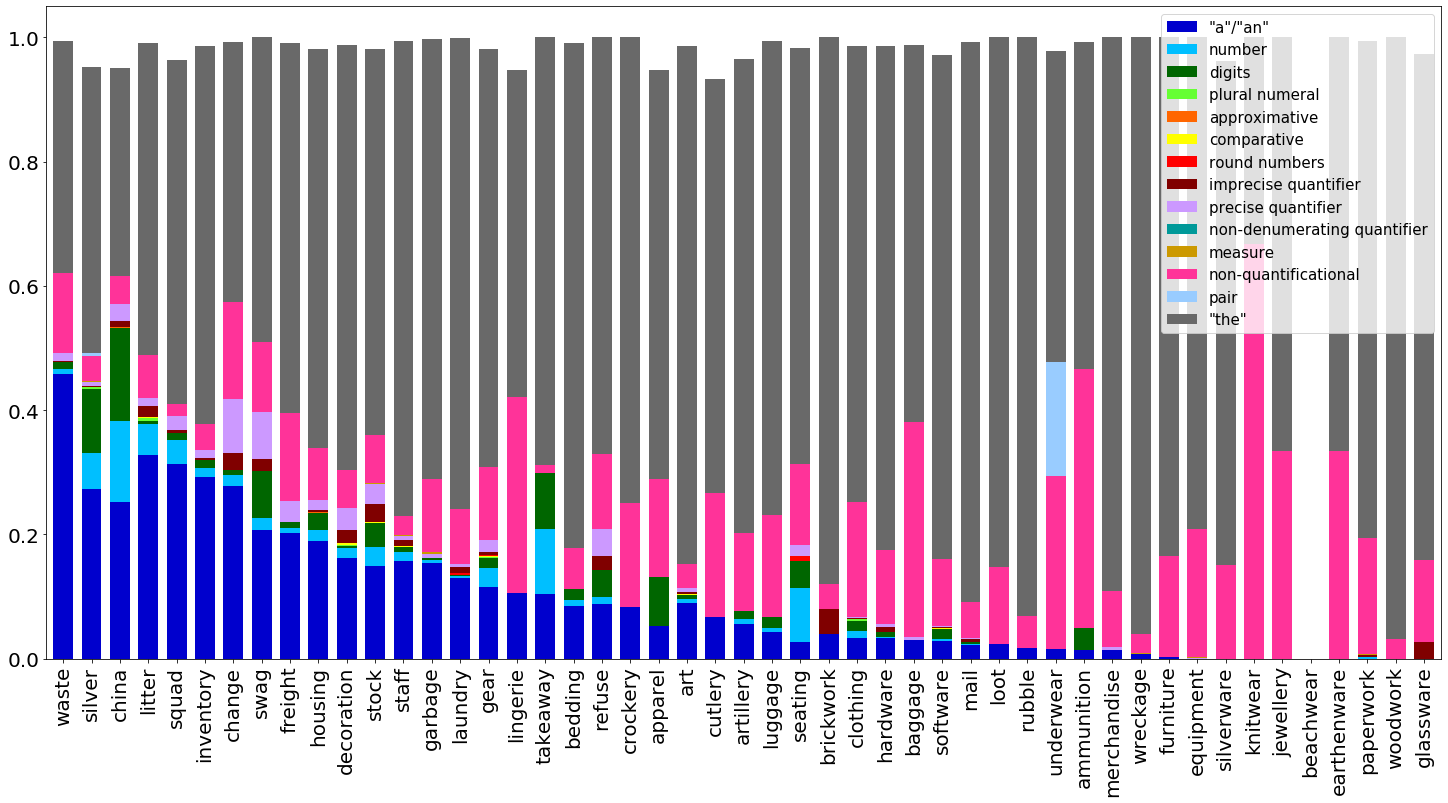

In [21]:
nouns = data['Noun'].values
aTest = data["A+N"].values
fTest = data["F+N"].values
# allTest = data["all+N"].values
oden = data["O-Den"].values
nonDnums = data["Non-Denumerators"].values
bp = data["Bare Plural"].values
bs = data["Bare Singular"].values
na = data["N/A"].values

labels = ["A+N","F+N", "O-Den", "Non-Denumerators", "N/A", "Bare Plural", "Bare Singular"]

#subtype graph data 
reqData = ['"a"/"an"', 'number', 'digits', 'plural numeral', 'approximative', 'comparative', 'round numbers',
             'imprecise quantifier', 'precise quantifier', 'non-denumerating quantifier',
            'measure', 'non-quantificational','pair','"the"']
pulledData = []
for c in reqData:
    pulledData.append(data[c].values)

xaxis = nouns 
index = pd.Index(xaxis)
index2 = pd.Index(xaxis)

plotData = {
    'A+N':aTest,
    'F+N':fTest,
    'O-Den':oden,
    'Non-Denumerators':nonDnums,
#     'N/A':na
#     'Bare Plural':bp,
#     'Bare Singular': bs
}


plot2Data = {}
for i in range(len(reqData)):
    plot2Data[reqData[i]] = pulledData[i]

color_map = palettable.cartocolors.qualitative.Bold_5_r.mpl_colormap
# color_map2 = palettable.cartocolors.qualitative.Bold_10_r.mpl_colormap
#grey:
# color_map = palettable.tableau.Gray_5.mpl_colormap
# color_map2 = palettable.colorbrewer.sequential.Greys_9_r.mpl_colormap

df = pd.DataFrame(plotData, index=index)
mpl.rcParams['hatch.color'] = 'white'

ax = df.plot(kind='bar', stacked=True, figsize=(25, 12), sort_columns=False, width = 0.7, fontsize=20, colormap=color_map)
ax.legend(loc=1, prop={'size':15})

df2 = pd.DataFrame(plot2Data, index=index2)
ax2 = df2.plot(kind='bar', stacked=True, figsize=(25, 12), sort_columns=False, width = 0.7, fontsize=20, colormap=cmap_custom)

bars = ax2.patches
hatches = ''.join(h*len(df2) for h in hatch_set)

#adding hatch marks 
# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)

ax2.legend(loc=1, prop={'size':15})
# ax2.legend(fontsize=15)

plt.show()
fig = ax.get_figure()
fig.savefig("AllanTest.pdf", bbox_inches='tight')

fig2 = ax2.get_figure()
fig2.savefig("SubType.pdf", bbox_inches='tight')

In [161]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [217]:
# heatData = data[["Noun","Non-Denumerators", "A+N", "F+N", "O-Den"]]
# nouns = heatData["Noun"].values
# heatData = heatData[heatData.columns.delete([0])].astype(float)
# heat = sns.heatmap(heatData, yticklabels=nouns)

In [114]:
data2 = data.drop(columns=["all+N"])
meltedData = pd.melt(data2, id_vars=['Noun'], var_name=['Tests'])

In [115]:
meltedData.value = meltedData.value.astype(float)

In [141]:
data.loc[data["Noun"]=='water', "A+N"].values[0]

float

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


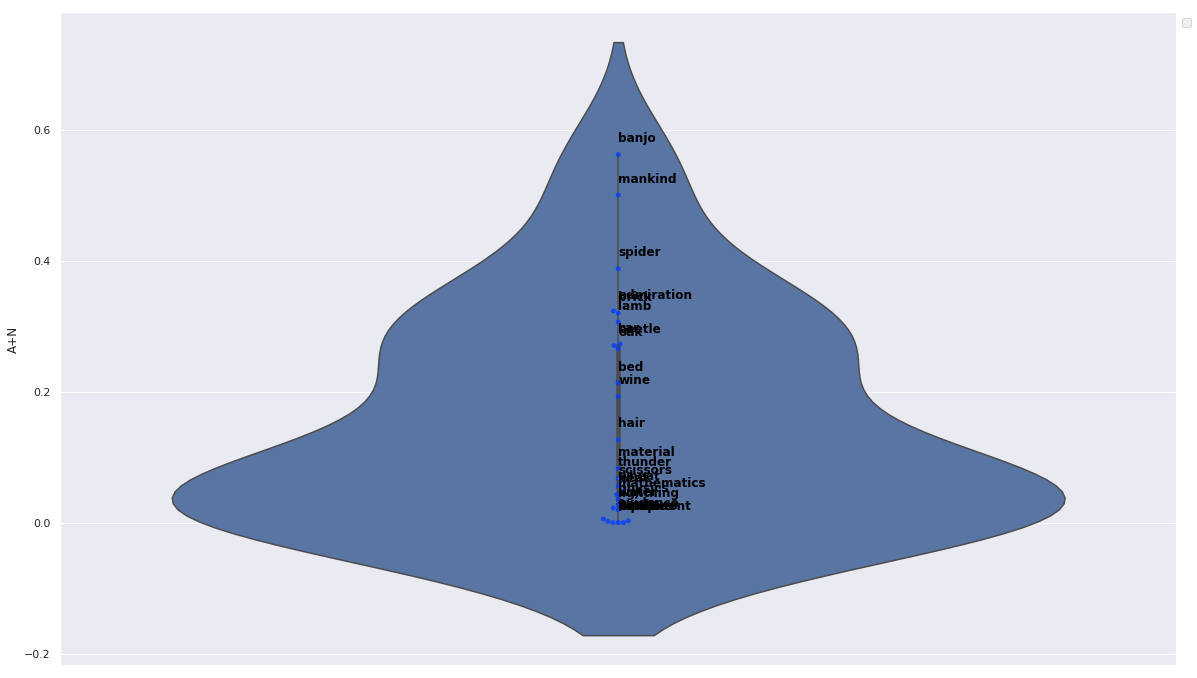

In [8]:
sns.set_style('whitegrid')
palette = sns.color_palette('bright')
sns.set(rc={'figure.figsize':(20,12)})
y = data['A+N'].values
sns.violinplot(y=y.astype(float))
plot2 = sns.swarmplot(data=data, y='A+N', alpha=0.8, hue="Noun", palette=palette)

for noun in data["Noun"].values:
    val = data.loc[data["Noun"] == noun, "A+N"].values[0]
    plot2.text(0,val+0.02,noun,horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.legend(bbox_to_anchor=(1, 1), loc=2)


No handles with labels found to put in legend.


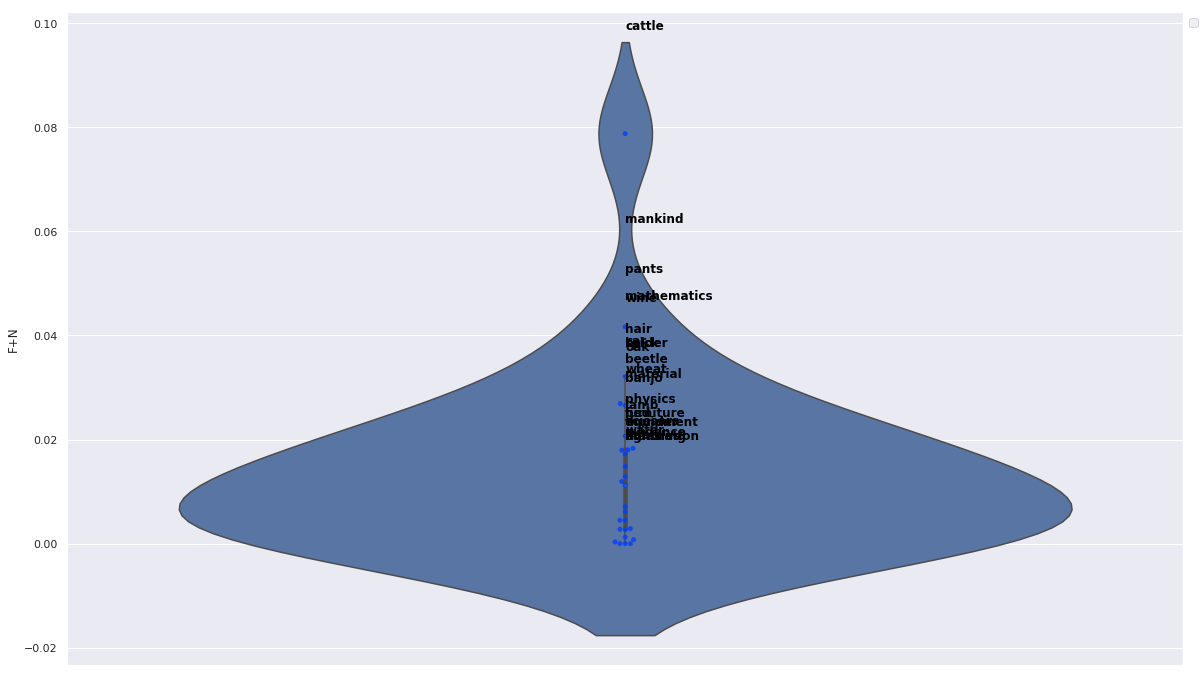

In [169]:
y = data['F+N'].values
sns.violinplot(y=y.astype(float))
plot2 = sns.swarmplot(data=data, y='F+N', alpha=0.8, hue="Noun", palette=palette)

for noun in data["Noun"].values:
    val = data.loc[data["Noun"] == noun, "F+N"].values[0]
    plot2.text(0,val+0.02,noun,horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.legend(bbox_to_anchor=(1, 1), loc=2)
